In [14]:
# load the haberman dataset and summarize the shape
from pandas import read_csv
# define the location of the dataset
url = 'haberman.csv'
# load the dataset
df = read_csv(url, header=None)
# summarize shape
print(df.shape)

(306, 4)


                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


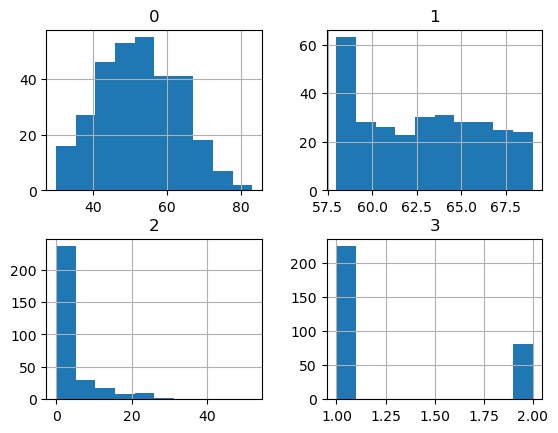

In [15]:
# show summary statistics and plots of the haberman dataset
from pandas import read_csv
from matplotlib import pyplot
# define the location of the dataset
url = 'haberman.csv'
# load the dataset
df = read_csv(url, header=None)
# show summary statistics
print(df.describe())
# plot histograms
df.hist()
pyplot.show()

In [16]:

# summarize the class ratio of the haberman dataset
from pandas import read_csv
from collections import Counter
# define the location of the dataset
url = 'haberman.csv'
# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']
# load the csv file as a data frame
dataframe = read_csv(url, header=None, names=columns)
# summarize the class distribution
target = dataframe['class'].values
counter = Counter(target)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [17]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [37]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense

# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Définir le taux d'apprentissage
learning_rate = 0.1

# Créer un optimiseur Adam avec le taux d'apprentissage spécifié
optimizer = Adam(learning_rate=learning_rate)
# compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0, validation_data=(X_test,y_test))

In [39]:
# Obtenir les scores d'entraînement et de validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Afficher les scores
print("Scores d'entraînement (loss):", train_loss)
print("Scores de validation (loss):", val_loss)

Scores d'entraînement (loss): [17.005069732666016, 1.6673277616500854, 0.6577438712120056, 0.6032374501228333, 0.6240131258964539, 0.5574718117713928, 0.5598289966583252, 0.5369806885719299, 0.552784264087677, 0.5500046014785767, 0.6174157857894897, 0.542685866355896, 0.5864985585212708, 0.5991005301475525, 0.5443937182426453, 0.5814499258995056, 0.6264643669128418, 0.578323245048523, 0.5641404986381531, 0.5823779106140137, 0.5777248740196228, 0.5809012651443481, 0.571956217288971, 0.5669179558753967, 0.5728011131286621, 0.5867524147033691, 0.5719897150993347, 0.5568689107894897, 0.5714210867881775, 0.5774299502372742, 0.5559667348861694, 0.5625090599060059, 0.5575608015060425, 0.5629911422729492, 0.6127153038978577, 0.5858102440834045, 0.583332896232605, 0.581670343875885, 0.5822043418884277, 0.5812326073646545, 0.5812327861785889, 0.5816880464553833, 0.5834644436836243, 0.5835739374160767, 0.5805513858795166, 0.5888757109642029, 0.5835399031639099, 0.5853790640830994, 0.5833196640014

In [42]:
# Importer le module statistics
import statistics

# Calculer la moyenne des scores d'exactitude d'entraînement
train_loss_mean = statistics.mean(train_loss)
# Calculer la moyenne des scores d'exactitude de validation
val_loss_mean = statistics.mean(val_loss)

# Afficher les moyennes
print("Train loss:", train_loss_mean)
print("Validation loss:", val_loss_mean)

Moyenne de l'exactitude d'entraînement: 0.6702452060580254
Moyenne de l'exactitude de validation: 0.6186178550124168


In [40]:
# Obtenir les scores d'entraînement et de validation pour l'exactitude
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Afficher les scores d'exactitude
print("Exactitude d'entraînement:", train_accuracy)
print("Exactitude de validation:", val_accuracy)


Exactitude d'entraînement: [0.6270492076873779, 0.5778688788414001, 0.6926229596138, 0.7213114500045776, 0.7459016442298889, 0.7540983557701111, 0.7581967115402222, 0.7581967115402222, 0.7540983557701111, 0.7418032884597778, 0.7172130942344666, 0.7459016442298889, 0.7213114500045776, 0.7295082211494446, 0.7377049326896667, 0.7581967115402222, 0.7295082211494446, 0.7377049326896667, 0.7336065769195557, 0.7254098653793335, 0.7213114500045776, 0.7295082211494446, 0.7418032884597778, 0.7336065769195557, 0.7254098653793335, 0.7295082211494446, 0.7254098653793335, 0.7540983557701111, 0.7336065769195557, 0.7254098653793335, 0.75, 0.7418032884597778, 0.7377049326896667, 0.7418032884597778, 0.7377049326896667, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065769195557, 0.7336065

In [41]:
# Importer le module statistics
import statistics

# Calculer la moyenne des scores d'exactitude d'entraînement
train_accuracy_mean = statistics.mean(train_accuracy)
# Calculer la moyenne des scores d'exactitude de validation
val_accuracy_mean = statistics.mean(val_accuracy)

# Afficher les moyennes
print("Moyenne de l'exactitude d'entraînement:", train_accuracy_mean)
print("Moyenne de l'exactitude de validation:", val_accuracy_mean)


Moyenne de l'exactitude d'entraînement: 0.732704935669899
Moyenne de l'exactitude de validation: 0.7412096846103668


In [35]:
from sklearn.metrics import accuracy_score


yhat = model.predict(X_test)

yhat = np.round(yhat_probs)

# Calculer l'exactitude
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)


2/2 [==============================] - 0s 5ms/step
Accuracy: 0.742


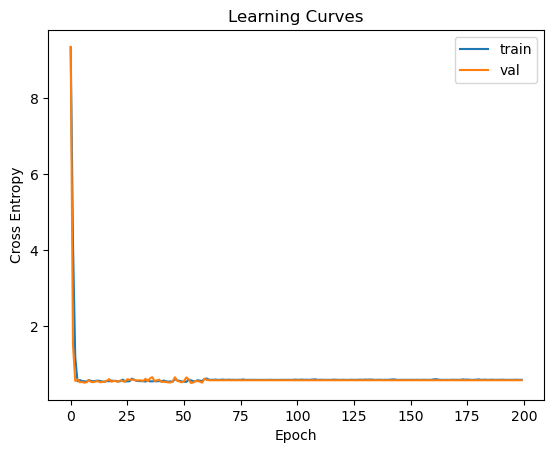

In [31]:
...
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
# fit a simple mlp model on the haberman and review learning curves
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict(X_test)
yhat = np.argmax(yhat_probs, axis=-1)

# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

TypeError: fit() got an unexpected keyword argument 'learning_rate'

In [ ]:
from sklearn.model_selection import KFold
from numpy import mean, std

# Préparation de la validation croisée
kfold = KFold(n_splits=10)
# Initialisation de la liste des scores
scores = []

# Enumération des séparations
for train_ix, test_ix in kfold.split(X, y):
    # Ajustement du modèle et évaluation...
    # Vous devrez compléter cette partie avec votre code
    
    # Ajouter le score à la liste
    scores.append(score)

# Calcul de la moyenne et de l'écart type des scores
mean_accuracy = mean(scores)
std_accuracy = std(scores)


In [ ]:

# Résumé de tous les scores
print('Mean Accuracy: %.3f (%.3f)' % (mean_accuracy, std_accuracy))

Mean Accuracy: 0.742 (0.000)


In [ ]:
# k-fold cross-validation of base model for the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# prepare cross validation
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
	# predict test set
	yhat_probs = model.predict(X_test)
	yhat = (yhat_probs > 0.5).astype("int32")
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

1/1 [==============================] - 0s 66ms/step
>0.710
1/1 [==============================] - 0s 82ms/step
>0.742
1/1 [==============================] - 0s 69ms/step
>0.774
1/1 [==============================] - 0s 71ms/step
>0.742
1/1 [==============================] - 0s 70ms/step
>0.742
1/1 [==============================] - 0s 83ms/step
>0.742
1/1 [==============================] - 0s 72ms/step
>0.800
1/1 [==============================] - 0s 68ms/step
>0.733
1/1 [==============================] - 0s 67ms/step
>0.767
1/1 [==============================] - 0s 71ms/step
>0.833
Mean Accuracy: 0.758 (0.034)


In [ ]:
...
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
le = LabelEncoder()
y = le.fit_transform(y)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
...
# define a row of new data
row = [30,64,1]

In [ ]:
...
# make prediction
yhat = model.predict([row])
yhat = np.argmax(yhat_probs, axis=-1)


1/1 [==============================] - 0s 79ms/step


In [ ]:
...
# invert transform to get label for class
yhat = le.inverse_transform(yhat)

In [ ]:
...
# report prediction
print('Predicted: %s' % (yhat[0]))

Predicted: 1


In [ ]:
# fit a final model and make predictions on new data for the haberman dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# load the dataset
path = 'haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
le = LabelEncoder()
y = le.fit_transform(y)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=200, batch_size=16, verbose=0)
# define a row of new data
row = [30,64,1]
# make prediction
yhat = model.predict([row])
yhat = np.argmax(yhat_probs, axis=-1)

# invert transform to get label for class
yhat = le.inverse_transform(yhat)
# report prediction
print('Predicted: %s' % (yhat[0]))

1/1 [==============================] - 0s 98ms/step
Predicted: 1
